In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

Importing the data set and examining it

In [2]:
data = pd.read_csv('all_data.csv')
print(data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
print(data.describe())

              Year  Life expectancy at birth (years)           GDP
count    96.000000                         96.000000  9.600000e+01
mean   2007.500000                         72.789583  3.880499e+12
std       4.633971                         10.672882  5.197561e+12
min    2000.000000                         44.300000  4.415703e+09
25%    2003.750000                         74.475000  1.733018e+11
50%    2007.500000                         76.750000  1.280220e+12
75%    2011.250000                         78.900000  4.067510e+12
max    2015.000000                         81.000000  1.810000e+13


Finding what years are looked at and which countries are included

In [5]:
print(data.Country.unique())
print(data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Changing the title of Life expectancy column so it is easy to call/use

In [6]:
data.rename(columns={'Life expectancy at birth (years)':'LifeExp'}, inplace=True)
print(data.head())

  Country  Year  LifeExp           GDP
0   Chile  2000     77.3  7.786093e+10
1   Chile  2001     77.3  7.097992e+10
2   Chile  2002     77.8  6.973681e+10
3   Chile  2003     77.9  7.564346e+10
4   Chile  2004     78.0  9.921039e+10


Finding the min and max of all countries

In [7]:
print(data.groupby(data.Country).min('LifeExp'))
print(data.groupby(data.Country).max('LifeExp'))

                          Year  LifeExp           GDP
Country                                              
Chile                     2000     77.3  6.973681e+10
China                     2000     71.7  1.211350e+12
Germany                   2000     78.0  1.949950e+12
Mexico                    2000     74.8  6.836480e+11
United States of America  2000     76.8  1.030000e+13
Zimbabwe                  2000     44.3  4.415703e+09
                          Year  LifeExp           GDP
Country                                              
Chile                     2015     80.5  2.783840e+11
China                     2015     76.1  1.106470e+13
Germany                   2015     81.0  3.890610e+12
Mexico                    2015     76.7  1.298460e+12
United States of America  2015     79.3  1.810000e+13
Zimbabwe                  2015     60.7  1.630467e+10


Making some graphs to see trends

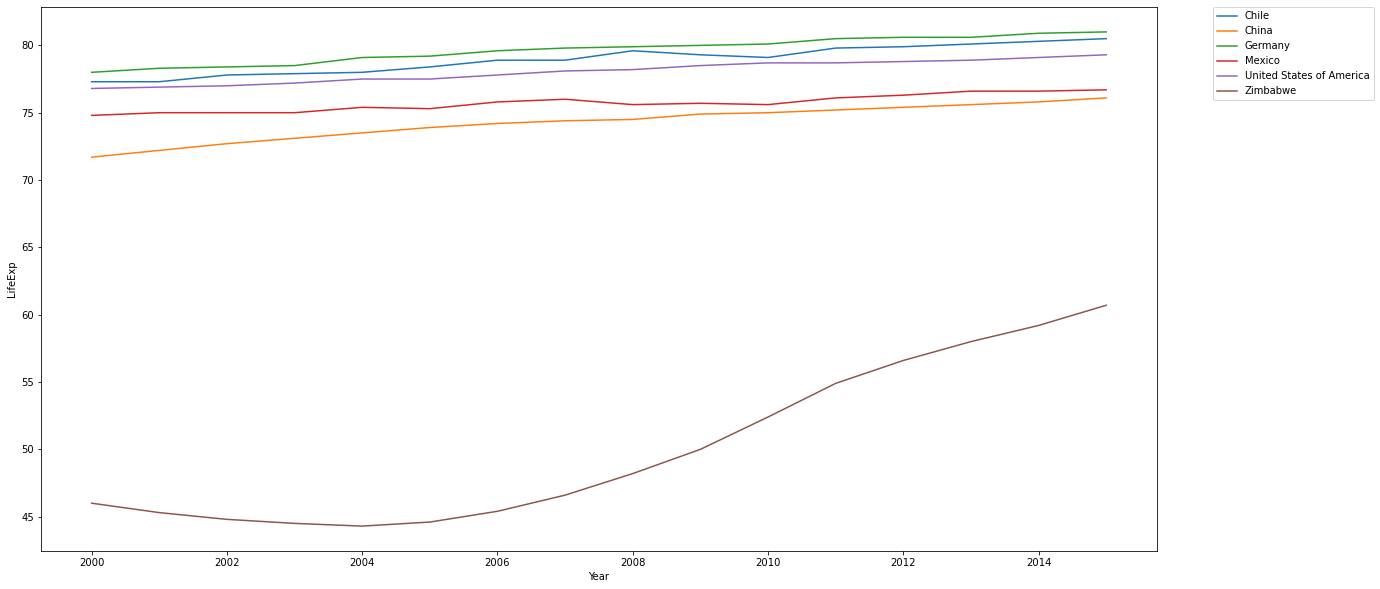

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.subplots(figsize=(20,10))
sns.lineplot(data=data, x=data.Year, y=data.LifeExp, hue=data.Country)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.clf()

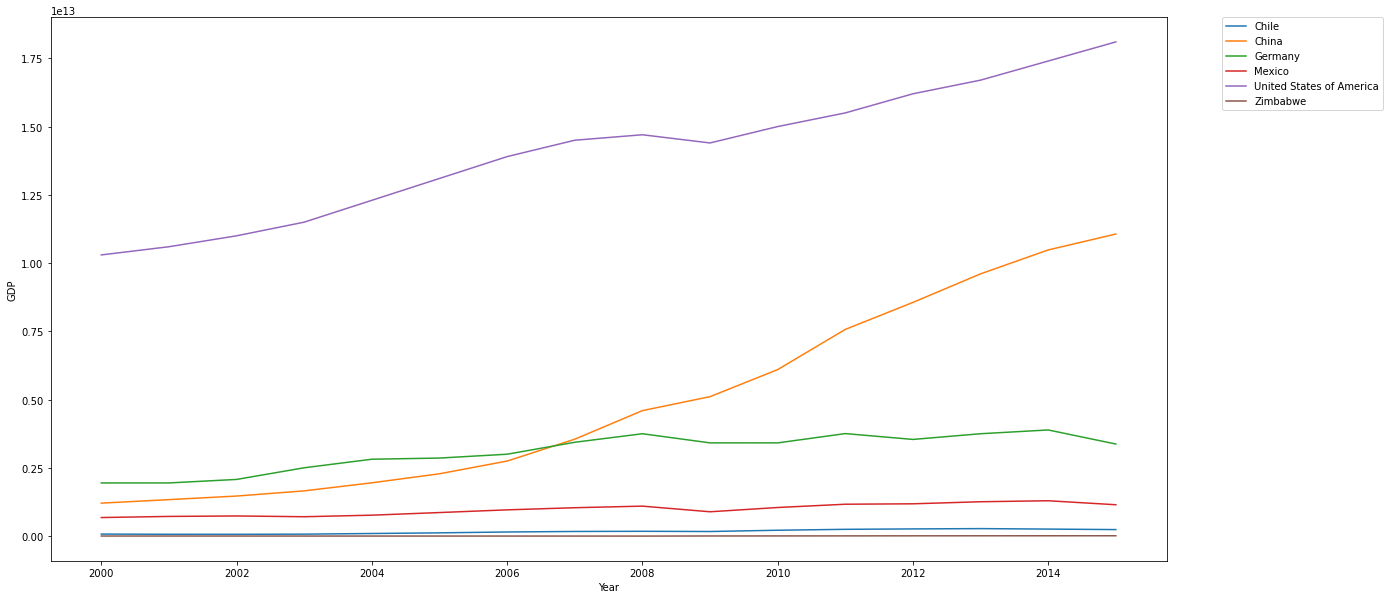

<Figure size 432x288 with 0 Axes>

In [9]:
fig = plt.subplots(figsize=(20,10))
sns.lineplot(data=data, x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()
plt.clf()

Trying different type of plot to better visualize the differences between countries.

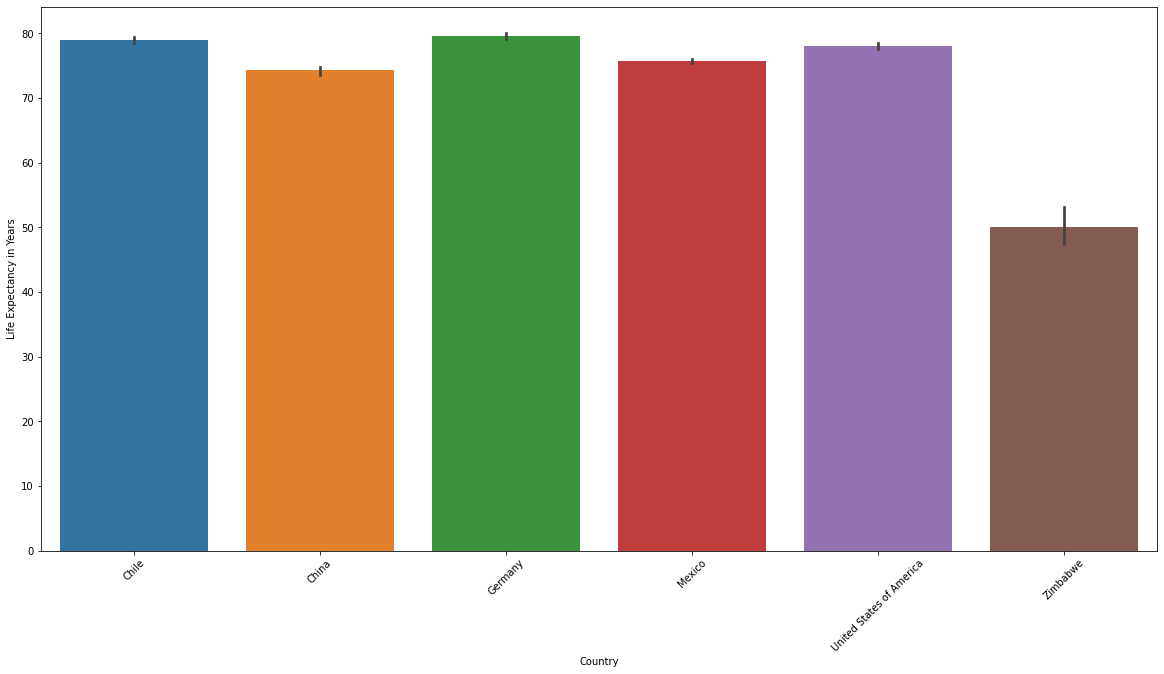

<Figure size 432x288 with 0 Axes>

In [10]:
### Life Expectancy comparison
fig = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x=data.Country, y=data.LifeExp)
plt.xticks(rotation=45)
plt.ylabel('Life Expectancy in Years')
plt.show()
plt.clf()

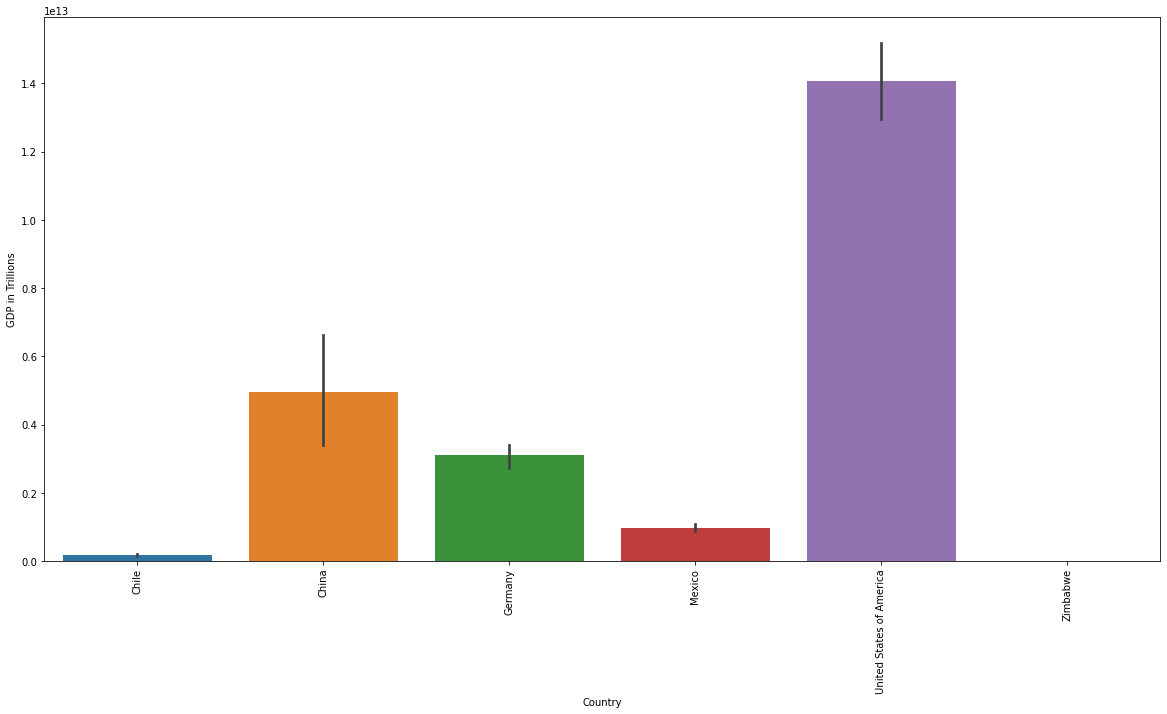

<Figure size 432x288 with 0 Axes>

In [11]:
### GDP comparison
fig = plt.subplots(figsize=(20,10))
sns.barplot(data=data, x=data.Country, y=data.GDP)
plt.xticks(rotation=90)
plt.ylabel('GDP in Trillions')
plt.show()
plt.clf()

Creating a function to get seperate graphs of each Country

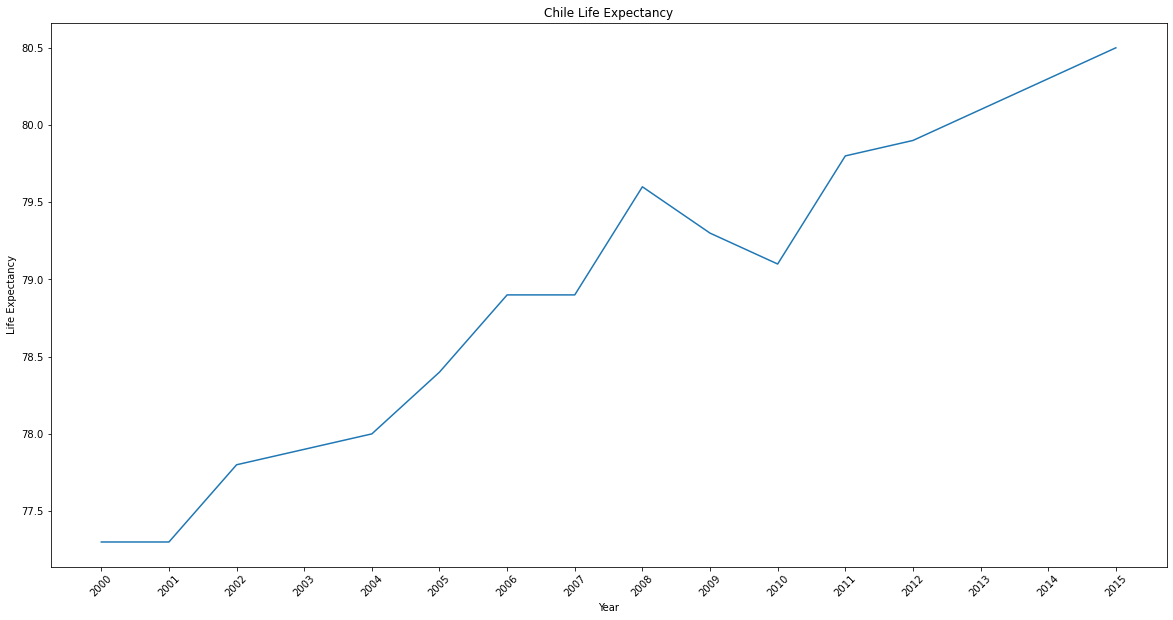

<Figure size 432x288 with 0 Axes>

In [12]:
def Country(name, df):
    country = df[df['Country'] == name]
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(country['Year'], country['LifeExp'])
    ax.set_xticks(country['Year'])
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title('{} Life Expectancy'.format(name))
    plt.show()

Country('Chile', data)
plt.clf()

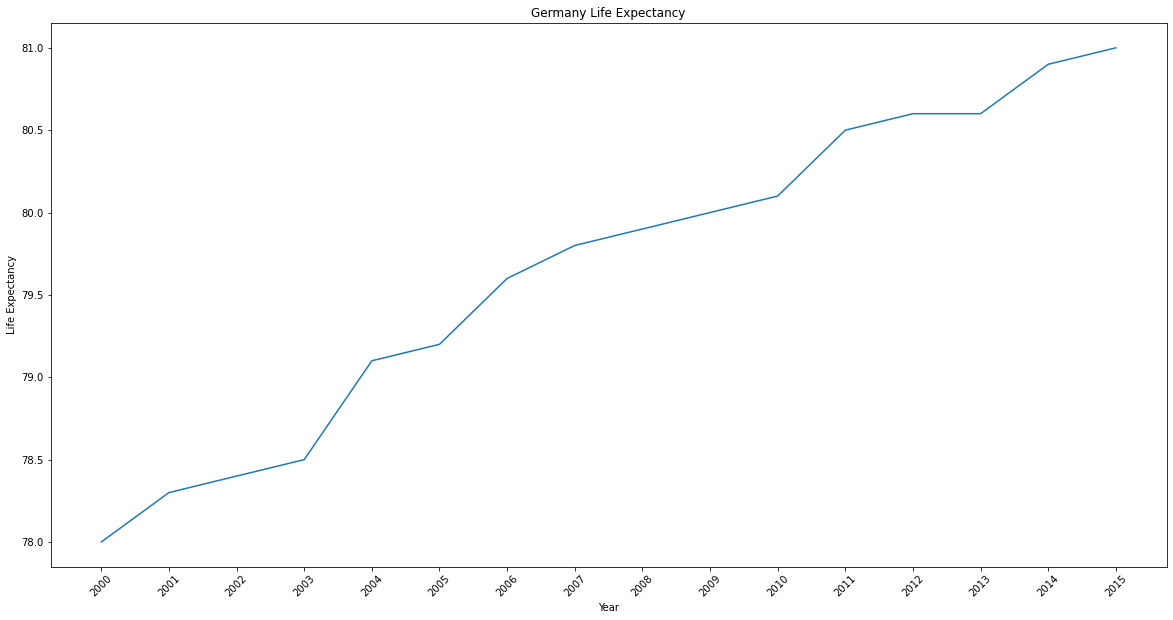

<Figure size 432x288 with 0 Axes>

In [13]:
Country('Germany', data)
plt.clf()

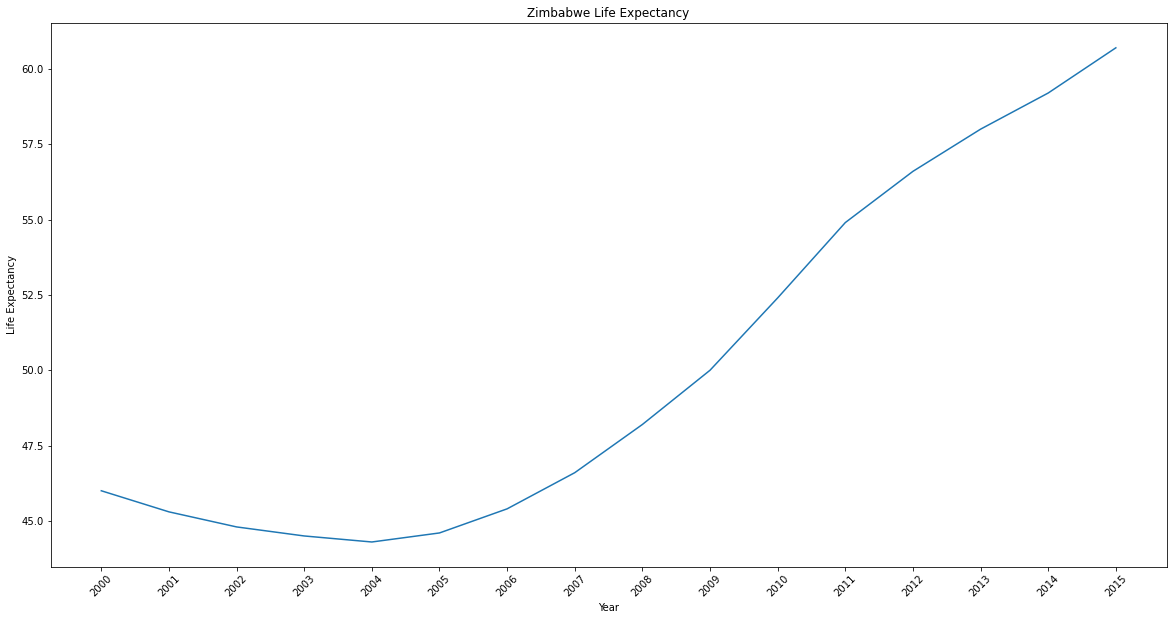

<Figure size 432x288 with 0 Axes>

In [14]:
Country('Zimbabwe', data)
plt.clf()

Creating a function to see GDP trends

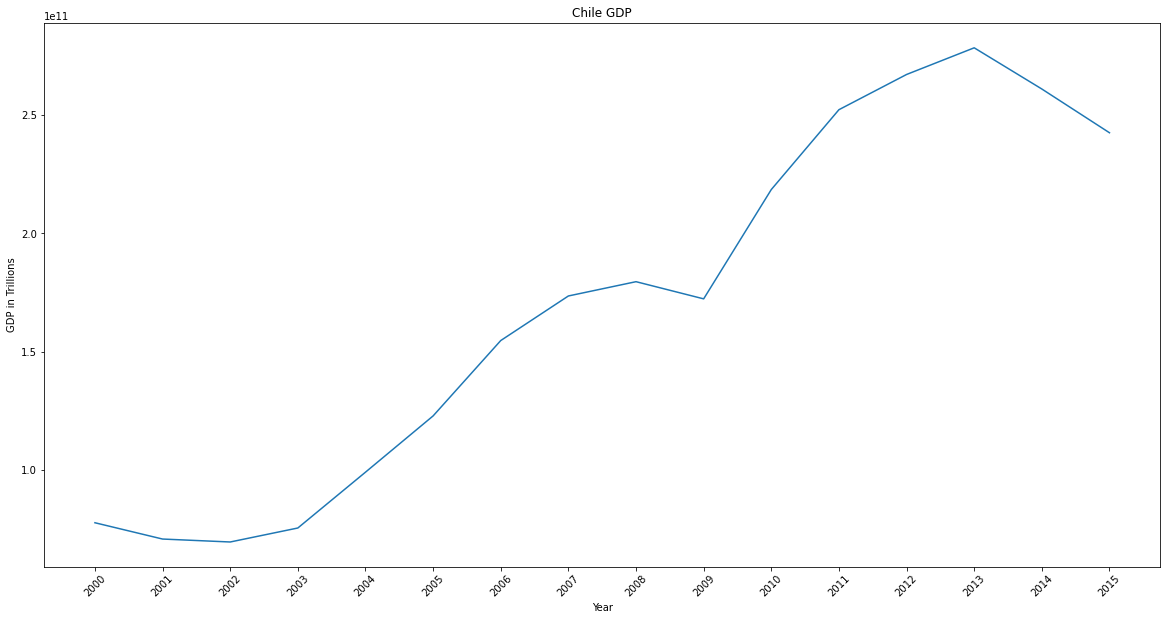

<Figure size 432x288 with 0 Axes>

In [15]:
def CountryGDP(name, df):
    country = df[df['Country'] == name]
    fig, ax = plt.subplots(figsize=(20,10))
    plt.plot(country['Year'], country['GDP'])
    ax.set_xticks(country['Year'])
    plt.xticks(rotation=45)
    plt.xlabel('Year')
    plt.ylabel('GDP in Trillions')
    plt.title('{} GDP'.format(name))
    plt.show()

CountryGDP('Chile', data)
plt.clf()

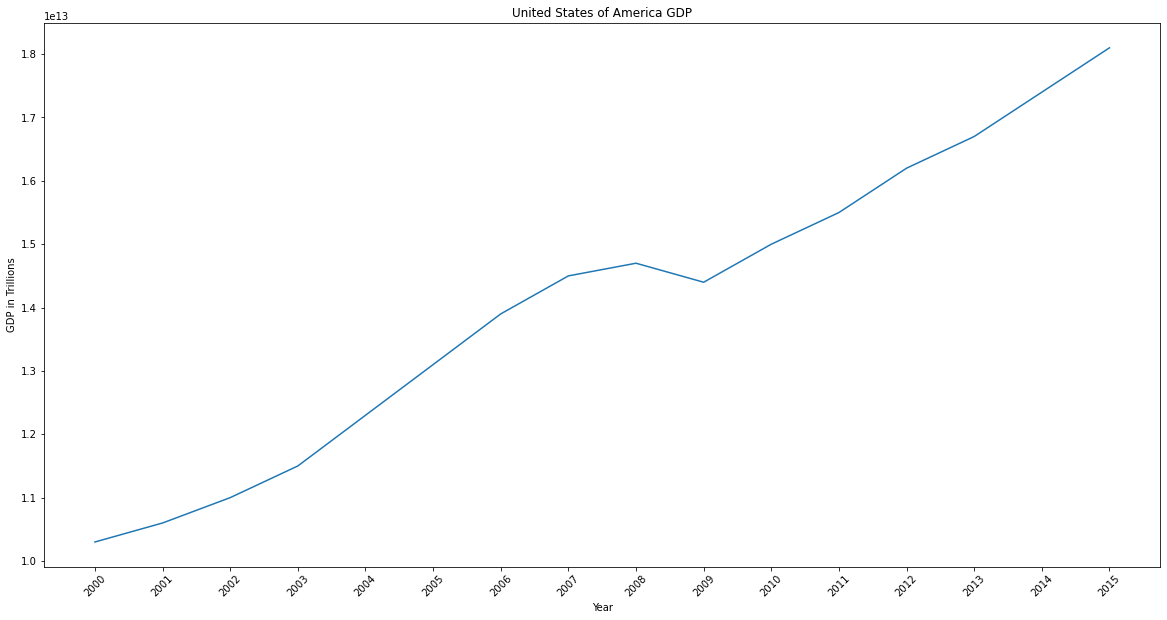

<Figure size 432x288 with 0 Axes>

In [16]:
CountryGDP('United States of America', data)
plt.clf()

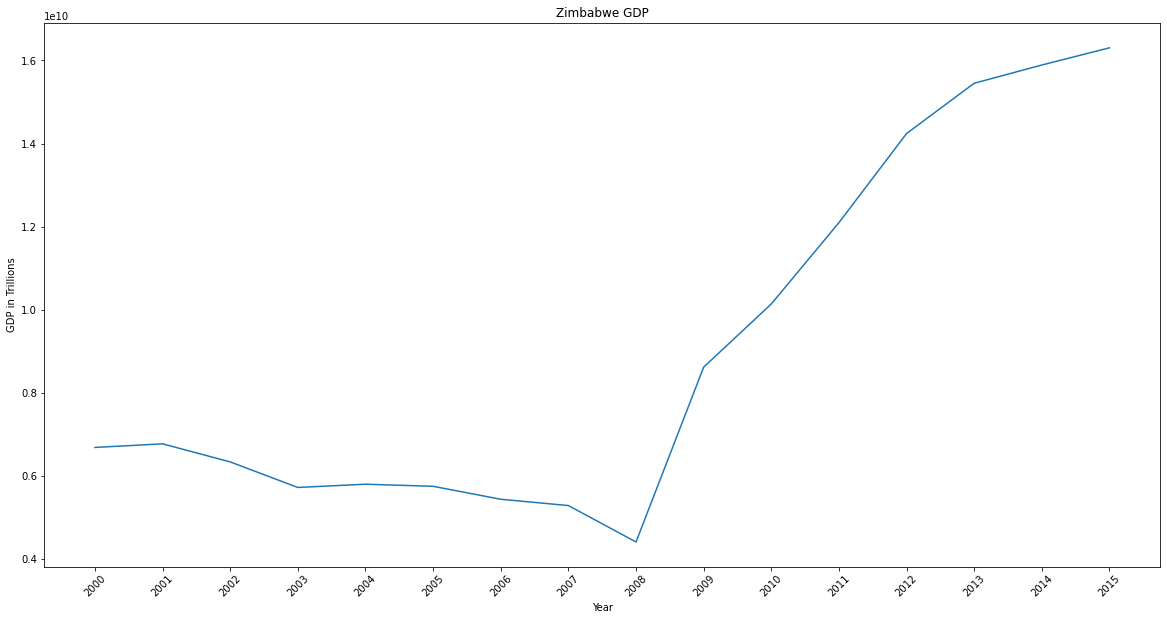

<Figure size 432x288 with 0 Axes>

In [17]:
CountryGDP('Zimbabwe', data)
plt.clf()

Using Seaborn grid plot ability to visualize all countries at the same time for easier comparison

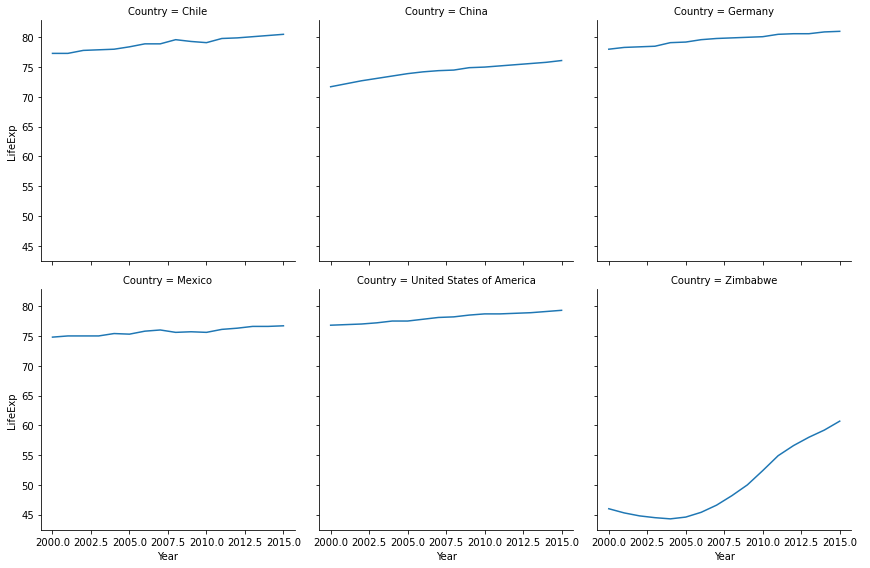

<Figure size 432x288 with 0 Axes>

In [18]:
LifeExpGrid = sns.FacetGrid(data, col="Country", col_wrap=3, height=4)
LifeExpGrid = (LifeExpGrid.map(plt.plot, "Year", "LifeExp").add_legend())
plt.show()
plt.clf()

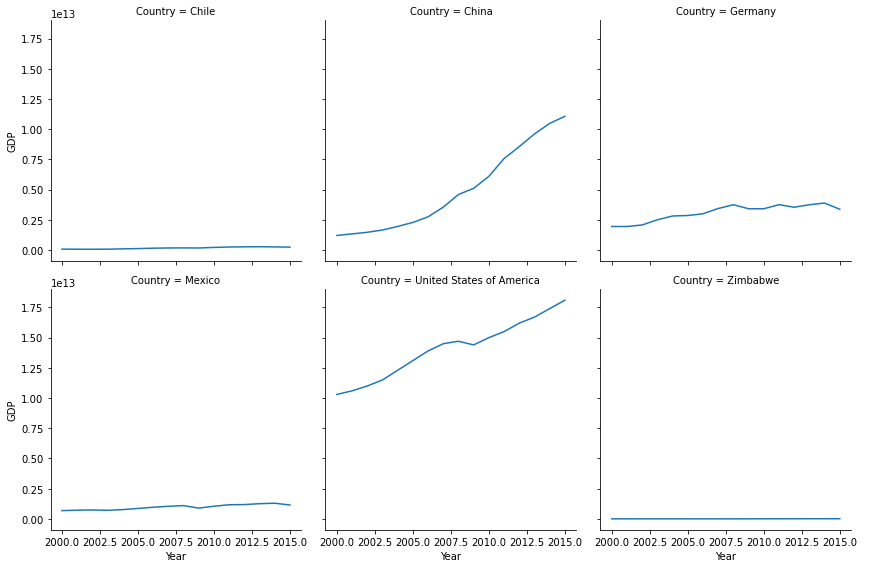

<Figure size 432x288 with 0 Axes>

In [19]:
GDPGrid = sns.FacetGrid(data, col="Country", col_wrap=3, height=4)
GDPGrid = (GDPGrid.map(plt.plot, "Year", "GDP").add_legend())
plt.show()
plt.clf()

Making violin plot to see distribution of life expectancy between the countries

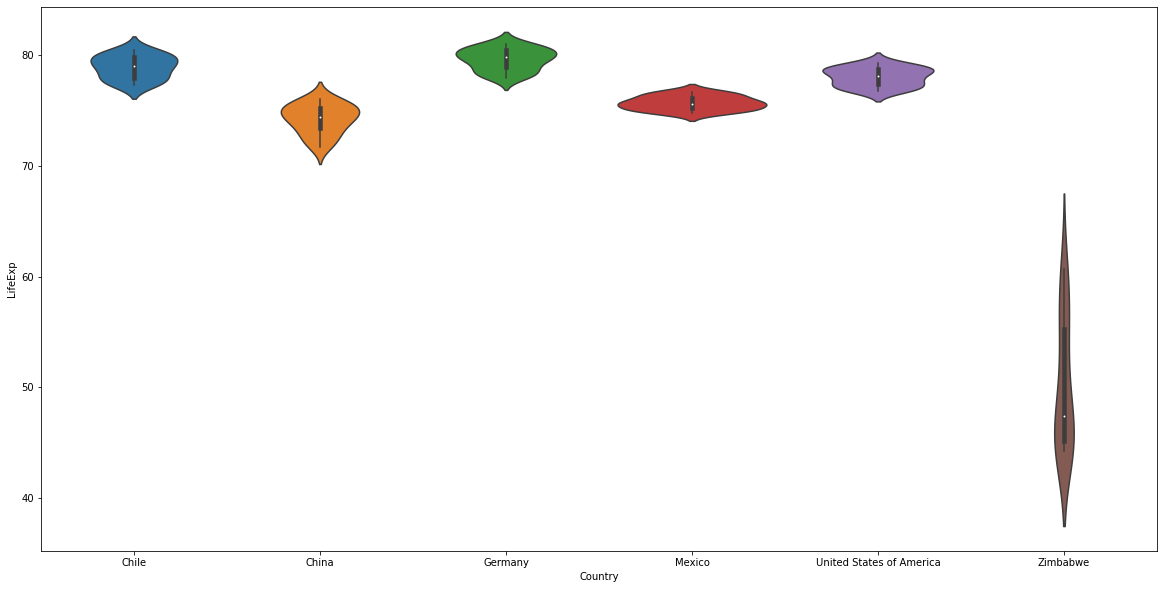

<Figure size 432x288 with 0 Axes>

In [20]:
fig = plt.subplots(figsize=(20,10))
sns.violinplot(data=data, x='Country', y='LifeExp')
plt.show()
plt.clf()

Fromt he data exploration and analysis, we can see that we are looking at information from CHile, China, Germany, Mexico, U.S.A., and Zimbabwe. The time period covers the years 2000-2015.

All countries have shown an increase in life expectancy. Zimbabwe had the largest change in life expectancy going from 44 to 60 over the 15 year period.

All countrie also had increase in their GDP, although China, Mexico, and Germany had a decrease in the past few years. Zimbabwe again had the largest change starting from 2008 going from 4,400,000,000 to 16,000,000,000.

It appears that life expectancy has increased for the countries even when there has been a GDP increase.